In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
ufcdf = pd.read_excel("data_i/i_fighter_data.xlsx", sheet_name='final')

In [3]:
ufcdf.head()

,Fighter,KD,SUB_ATT,SIG_STR_pct,REV,SIG_STR._lan,SIG_STR._att,TOTAL_STR._lan,TOTAL_STR._att,TD_lan,...,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,R_age,division
0,Aalon Cruz,0,0,0.16,0,2,15,2,15,0,...,0,0,0,0,0,182.88,198.12,145.0,30.0,Lightweight Division
1,Aaron Brink,0,0,0.00,0,0,5,0,5,0,...,0,0,0,0,0,190.50,NaN,205.0,27.0,Heavyweight Division
2,Aaron Phillips,0,1,1.55,1,62,109,346,432,0,...,0,0,0,0,0,175.26,180.34,135.0,31.0,Bantamweight Division
3,Aaron Riley,0,1,3.10,0,314,904,581,1190,8,...,0,3,0,0,0,172.72,175.26,155.0,32.0,Lightweight Division
4,Aaron Rosa,0,0,0.99,0,132,290,407,598,0,...,0,0,0,0,0,193.04,195.58,205.0,34.0,Light Heavyweight Division


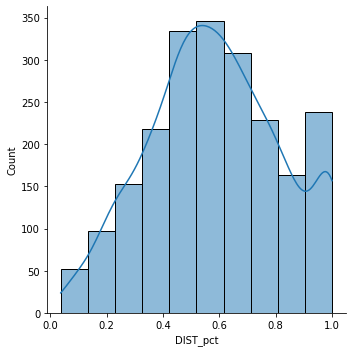

In [4]:
dist = ufcdf['DIST_pct']
ctrl = ufcdf['CTRL_RT']
sns.displot(ufcdf, x=dist, bins=10, kde=True)

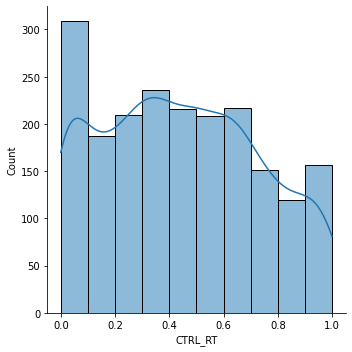

In [5]:
sns.displot(ufcdf, x=ctrl, bins=10, kde=True)

In [6]:
dist.describe()

count    2139.000000
mean        0.584846
std         0.232249
min         0.036626
25%         0.427976
50%         0.578447
75%         0.753808
max         1.000000
Name: DIST_pct, dtype: float64

In [7]:
ctrl.describe()

count    2010.000000
mean        0.443636
std         0.288359
min         0.000000
25%         0.202946
50%         0.432177
75%         0.663681
max         1.000000
Name: CTRL_RT, dtype: float64

In [8]:
# define the threshold values for the different fighting styles
dist_threshold = dist.quantile([0.33, 0.67])
ctrl_threshold = ctrl.quantile([0.33, 0.67])

In [9]:
# create a function to categorize each fighter based on their dist_pct and ctrl_rate values
def categorize_fighter(row):
    if row["DIST_pct"] <= dist_threshold[0.33] and row["CTRL_RT"] <= ctrl_threshold[0.33]:
        return "Wrestling/Grappling Heavy - Non dominant wrestling/grappling"
    elif row["DIST_pct"] >= dist_threshold[0.67] and row["CTRL_RT"] >= ctrl_threshold[0.67]:
        return "Distance Striking Heavy - Dominant grappling/wrestling"
    elif row["DIST_pct"] <= dist_threshold[0.33] and row["CTRL_RT"] >= ctrl_threshold[0.67]:
        return "Wrestling/Grappling Heavy - Dominant wrestling/grappling"
    elif row["DIST_pct"] >= dist_threshold[0.67] and row["CTRL_RT"] <= ctrl_threshold[0.33]:
        return "Distance Striking Heavy - Non dominant wrestling/grappling"
    elif dist_threshold[0.33] < row["DIST_pct"] < dist_threshold[0.67] and row["CTRL_RT"] >= ctrl_threshold[0.67]:
        return "Balanced - Dominant wrestling/grappling"
    elif dist_threshold[0.33] < row["DIST_pct"] < dist_threshold[0.67] and row["CTRL_RT"] <= ctrl_threshold[0.33]:
        return "Balanced - Non dominant wrestling/grappling"
    elif row["DIST_pct"] <= dist_threshold[0.33] and ctrl_threshold[0.33] < row["CTRL_RT"] < ctrl_threshold[0.67] :
        return "Wrestling/Grappling Heavy - Balanced"
    elif row["DIST_pct"] >= dist_threshold[0.67] and ctrl_threshold[0.33] < row["CTRL_RT"] < ctrl_threshold[0.67] :
        return "Distance Striking Heavy - Balanced"
    else:
        return "Balanced fighter"

In [10]:
# ufcdf["label"] = ufcdf.apply(categorize_fighter, axis=1)

# ufcdf.to_excel('data_i/i_ufc_grouped_data_target.xlsx', index=False)

In [17]:
ufcdf = pd.read_excel("data_i/i_ufc_grouped_data_target.xlsx")

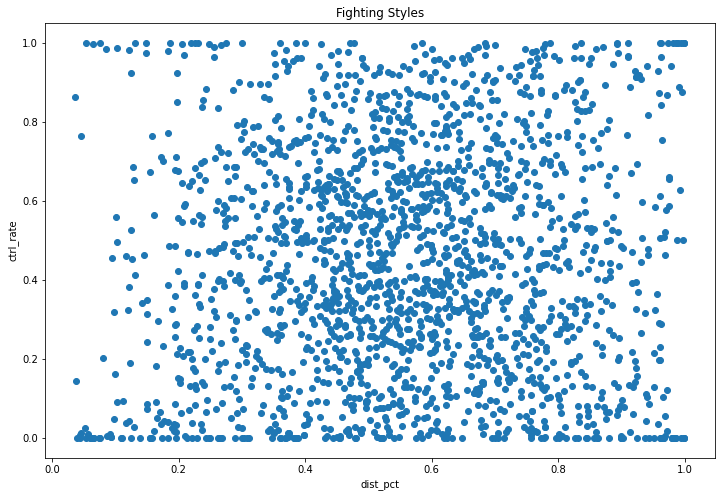

In [18]:
# create a scatter plot of dist_pct against ctrl_rate
fig = plt.figure(figsize=(12,8))
plt.scatter(dist, ctrl)

# label the x and y axes
plt.xlabel("dist_pct")
plt.ylabel("ctrl_rate")

# set the title of the plot
plt.title("Fighting Styles")

plt.show()

In [19]:
ufcdf.head(10)

,Fighter,KD,SUB_ATT,SIG_STR_pct,REV,SIG_STR._lan,SIG_STR._att,TOTAL_STR._lan,TOTAL_STR._att,TD_lan,...,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,R_age,division,label,lab_num
0,Aalon Cruz,0,0,0.16,0,2,15,2,15,0,...,0,0,0,182.88,198.12,145.0,30.0,Lightweight Division,Distance Striking Heavy - Non dominant wrestli...,6
1,Aaron Brink,0,0,0.00,0,0,5,0,5,0,...,0,0,0,190.50,NaN,205.0,27.0,Heavyweight Division,Distance Striking Heavy - Non dominant wrestli...,6
2,Aaron Phillips,0,1,1.55,1,62,109,346,432,0,...,0,0,0,175.26,180.34,135.0,31.0,Bantamweight Division,Wrestling/Grappling Heavy - Non dominant wrest...,9
3,Aaron Riley,0,1,3.10,0,314,904,581,1190,8,...,0,0,0,172.72,175.26,155.0,32.0,Lightweight Division,Distance Striking Heavy - Dominant grappling/w...,5
4,Aaron Rosa,0,0,0.99,0,132,290,407,598,0,...,0,0,0,193.04,195.58,205.0,34.0,Light Heavyweight Division,Balanced - Non dominant wrestling/grappling,2
5,Aaron Simpson,6,4,6.13,0,454,860,800,1265,32,...,2,0,0,182.88,185.42,170.0,38.0,Welterweight Division,Balanced - Dominant wrestling/grappling,1
6,Aaron Wilkinson,0,0,0.00,1,0,1,0,1,1,...,0,0,0,177.80,NaN,155.0,26.0,Lightweight Division,Wrestling/Grappling Heavy - Dominant wrestling...,8
7,Abdul Razak Alhassan,6,0,4.01,1,179,371,197,395,2,...,4,0,0,177.80,185.42,170.0,35.0,Middleweight Division,Balanced - Non dominant wrestling/grappling,2
8,Abdul-Kerim Edilov,0,1,0.61,0,77,125,150,210,2,...,0,0,0,187.96,NaN,205.0,29.0,Light Heavyweight Division,Wrestling/Grappling Heavy - Dominant wrestling...,8
9,Abel Trujillo,3,3,4.03,0,273,662,370,767,15,...,3,1,0,172.72,177.80,155.0,33.0,Lightweight Division,Balanced fighter,3


In [20]:
# define colors for each label value
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'orange', 'pink', 'indigo']

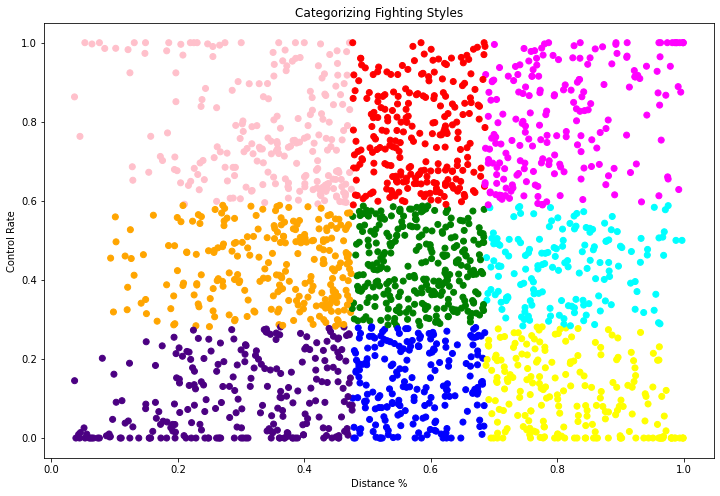

In [21]:
label = ufcdf['lab_num']

# create a scatter plot
fig = plt.figure(figsize=(12,8))
plt.scatter(dist, ctrl, c=label, cmap=matplotlib.colors.ListedColormap(colors))

# set axis labels and title
plt.xlabel('Distance %')
plt.ylabel('Control Rate')
plt.title('Categorizing Fighting Styles')

# show the plot
plt.show()